# My implementation of the following content
https://www.youtube.com/watch?v=lo1xh8C8qTM&ab_channel=Rapha%C3%ABlTinarrage
https://github.com/raphaeltinarrage/EMAp/blob/main/Tutorial1.ipynb

#### In the end of this notebook I contribute with a function that aid the vizualization of 'faces'. On timestamp 1h05 there is a dicussion about how NetworkX plot the network and how Gudhi understand the topology. 

### Lesson IV: Simplicial complexes and topological invariants

In [1]:
import gudhi
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import itertools as it

### Functions provided by the author

In [2]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict 
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    plt.figure(figsize=(7,5),dpi=250)
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos=pos, with_labels=True, node_color='tab:blue')
    plt.show()
    
def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = True):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

### The problem
In the two examples bellow, from a network perspective both the topology is the same. But from a simplicial complex perspective, they are differente. The first only has edges, while the other has a triangle.

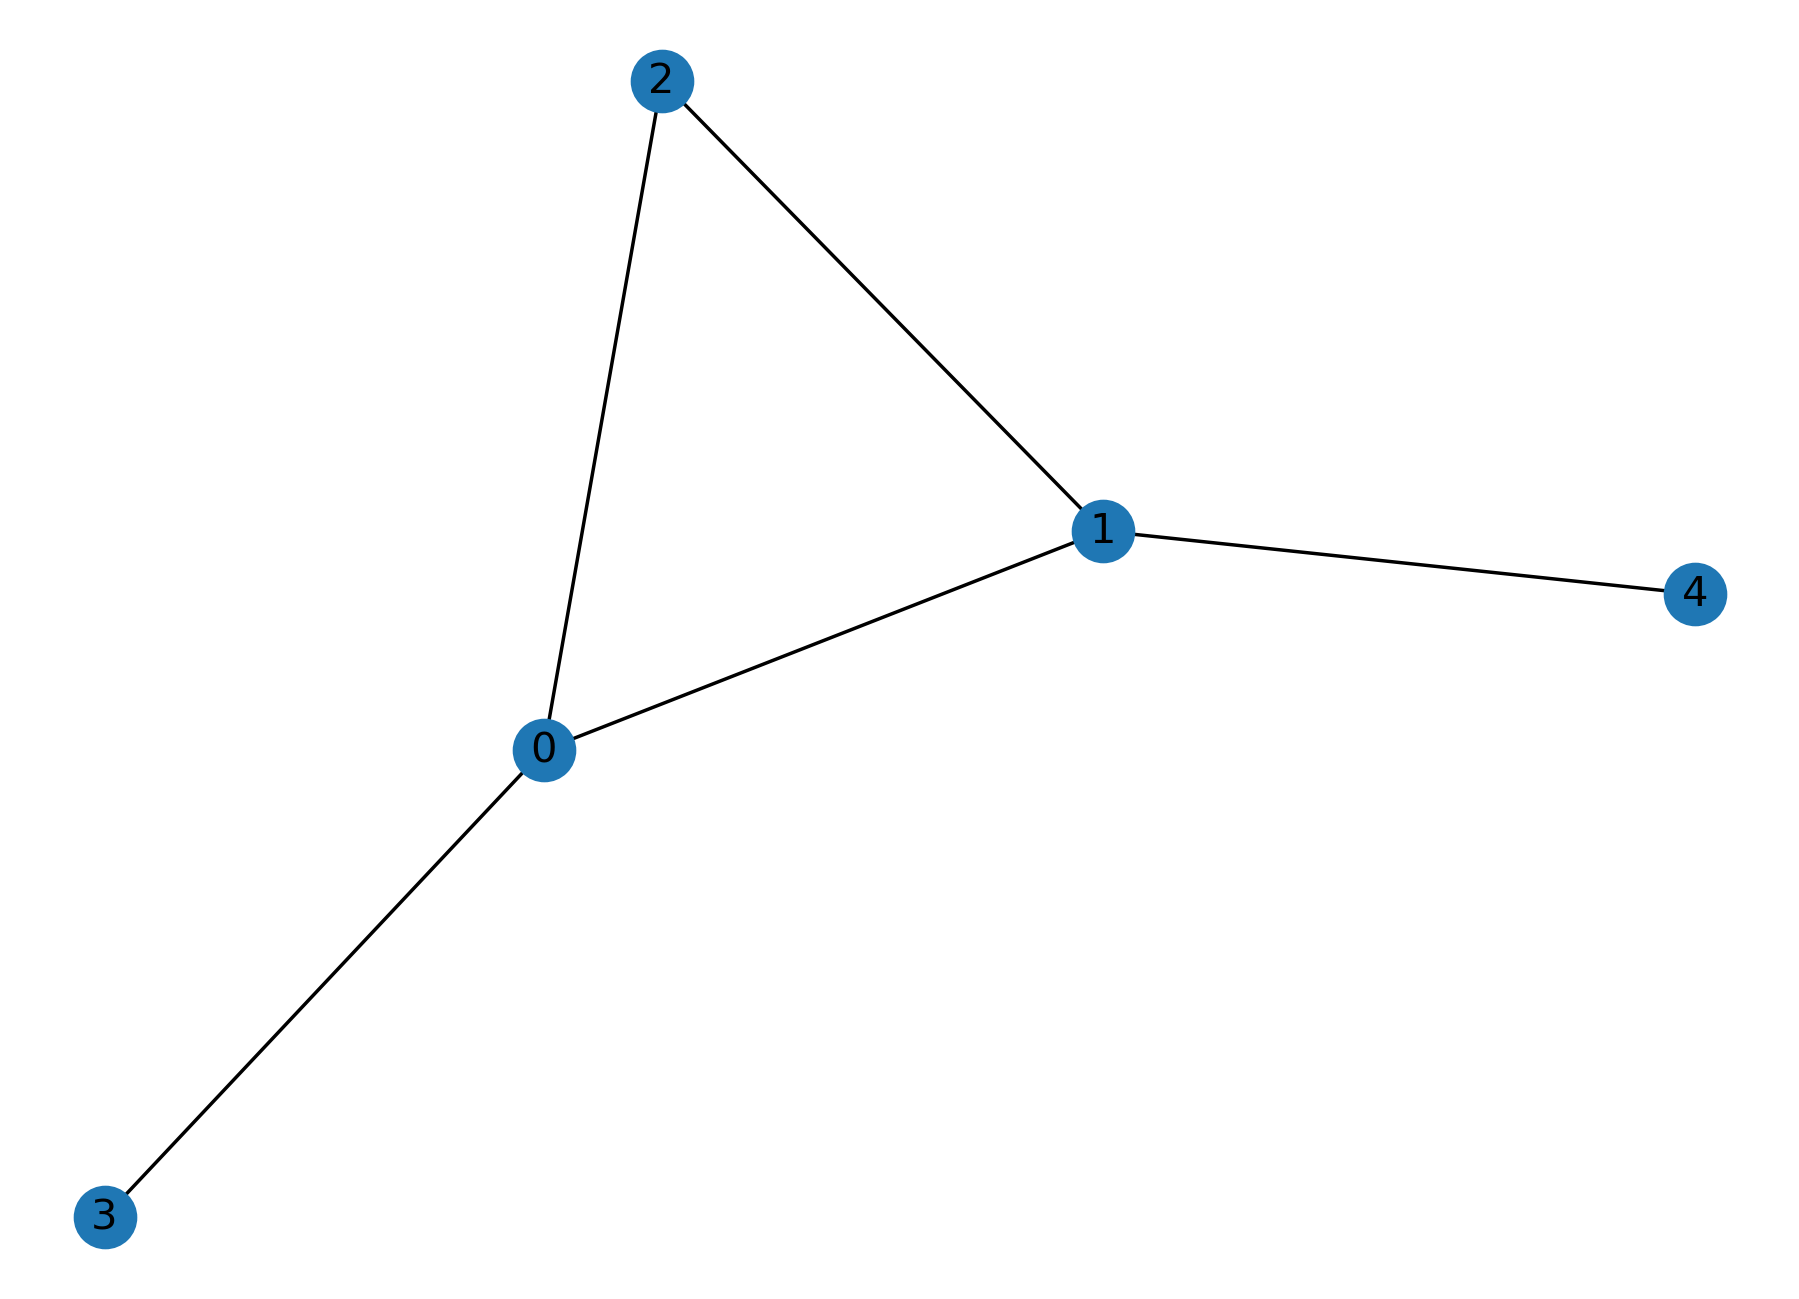

The simplicial complex has Euler characteristic equal to 0.


0

In [3]:
onlyEdges = gudhi.SimplexTree()
onlyEdges.insert([0,1])
onlyEdges.insert([1,2])
onlyEdges.insert([2,0])
onlyEdges.insert([3,0])
onlyEdges.insert([4,1])
DrawSimplicialComplex(onlyEdges)
EulerCharacteristic(onlyEdges,verbose=True)

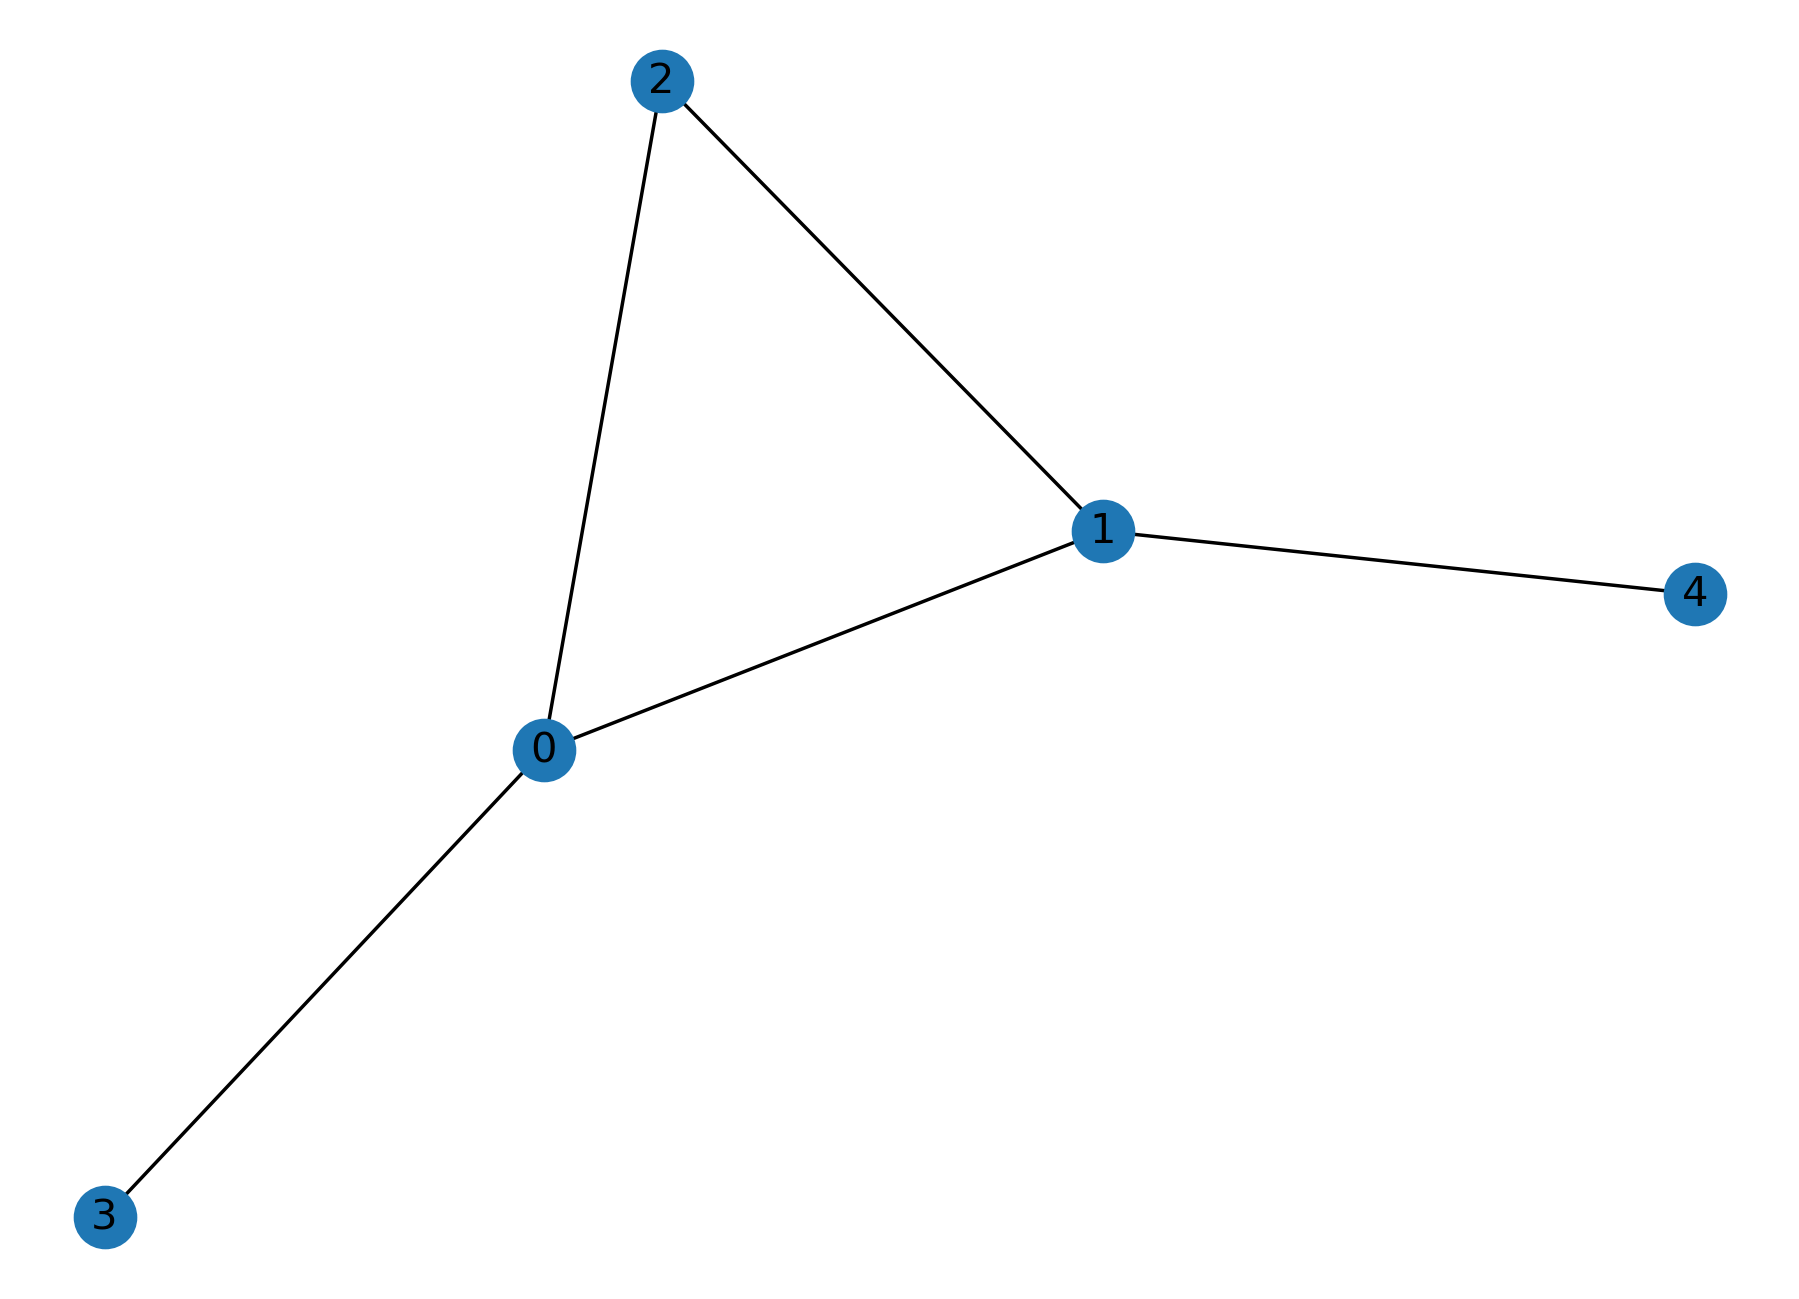

The simplicial complex has Euler characteristic equal to 1.


1

In [4]:
edgesAndTriangle = gudhi.SimplexTree()
edgesAndTriangle.insert([0,1,2])
edgesAndTriangle.insert([1,4])
edgesAndTriangle.insert([0,3])
DrawSimplicialComplex(edgesAndTriangle)
EulerCharacteristic(edgesAndTriangle,verbose=True)

# Solution 

In [5]:
def createNetworkxFromGudhi(simpcomplex):
    '''
    Given a simplicial complex (Gudhi), creates a NetworkX network
    '''
    G = nx.Graph()
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            G.add_node(simplex[0])
        if len(simplex)==2:
            G.add_edge(*simplex)
    return G

def getListOfTrianglesFromGudhi(simpcomplex):
    listOfTriangles = []
    for filtr in simpcomplex.get_skeleton(2):
        simplex = filtr[0]    
        if len(simplex)==3:
            listOfTriangles.append(simplex)
    return listOfTriangles

def getListOfTetrahedronsFromGudhi(simpcomplex):
    listOfTetrahedron = []
    for filtr in simpcomplex.get_skeleton(3):
        simplex = filtr[0]    
        if len(simplex)==4:
            listOfTetrahedron.append(simplex)
    return listOfTetrahedron

def plotFaces(simpcomplex):
    G = createNetworkxFromGudhi(simpcomplex)
    pos = nx.kamada_kawai_layout(G)

    triangles = getListOfTrianglesFromGudhi(simpcomplex)
    
    plt.figure(figsize=(7,5),dpi=250)

    for tri in triangles:
        xyPosition = {}
        for v in tri:
            xyPosition[v]=pos[v]

        pts = list(xyPosition.values())
        ax = plt.gca()
        ax.add_patch(Polygon(pts, closed=False, fc='cyan',alpha=0.2))

    nx.draw_kamada_kawai(G,with_labels=True,node_size=125,font_size=8)
    euler='Euler characteristic: '+str(EulerCharacteristic(simpcomplex,verbose=False))
    N = 'Nodes: '+str(nx.number_of_nodes(G))
    E = 'Edges: '+str(nx.number_of_edges(G))
    plt.title('The simplicial complex has\n'+N+' | '+E+' | '+euler)
    plt.show()

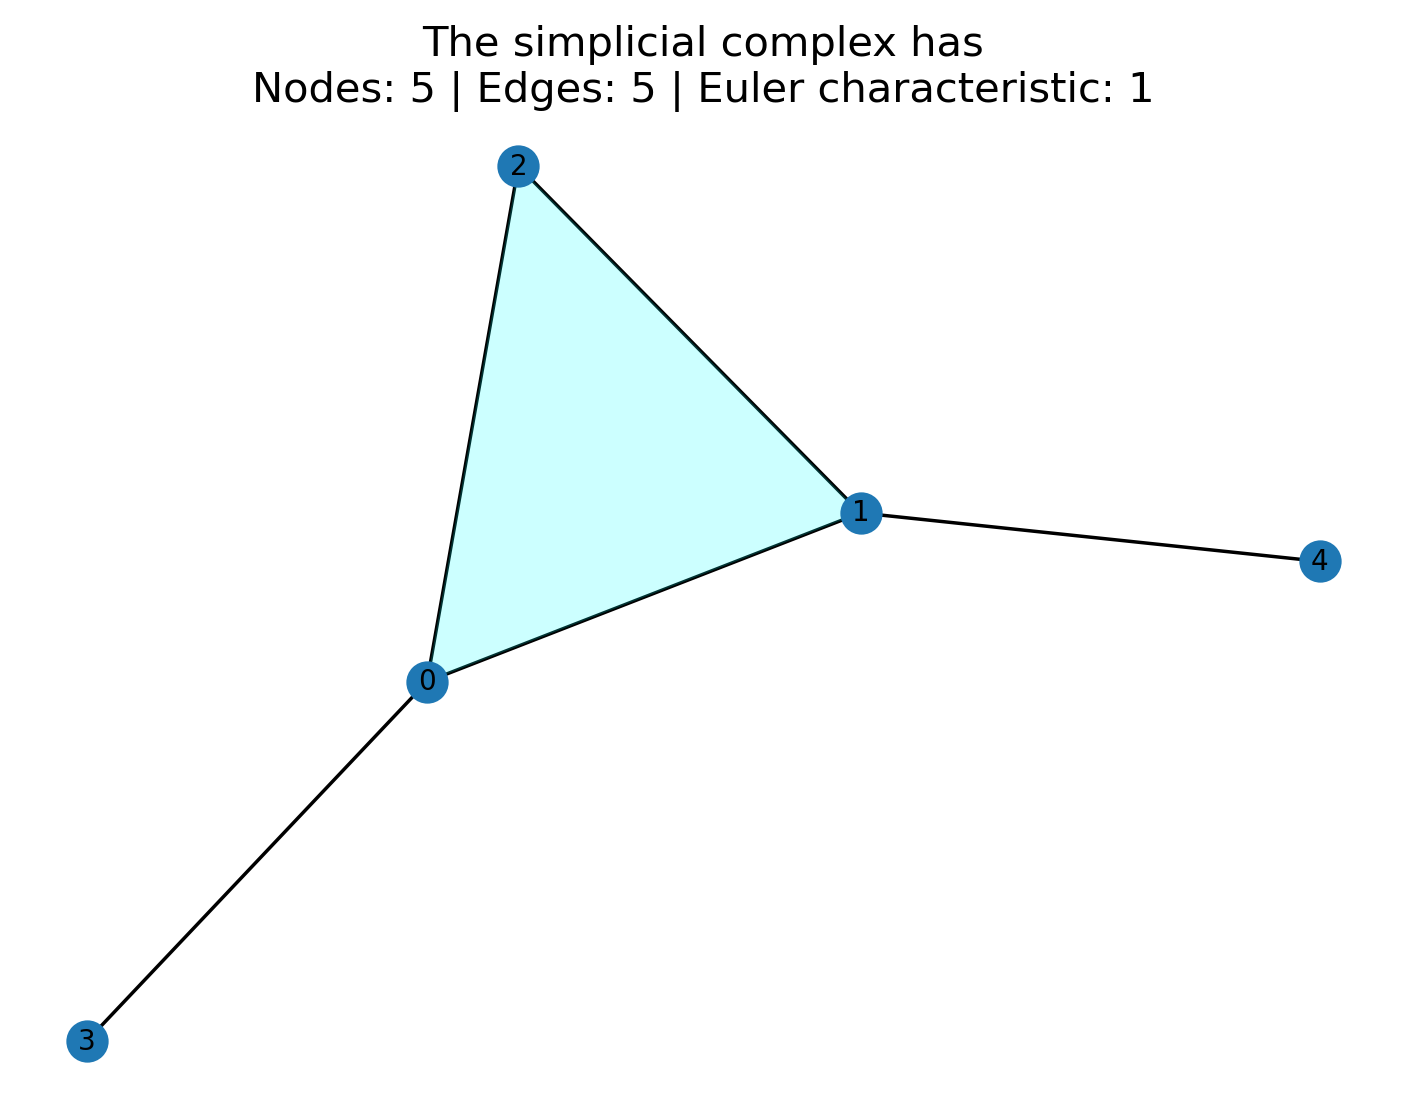

In [6]:
plotFaces(edgesAndTriangle)

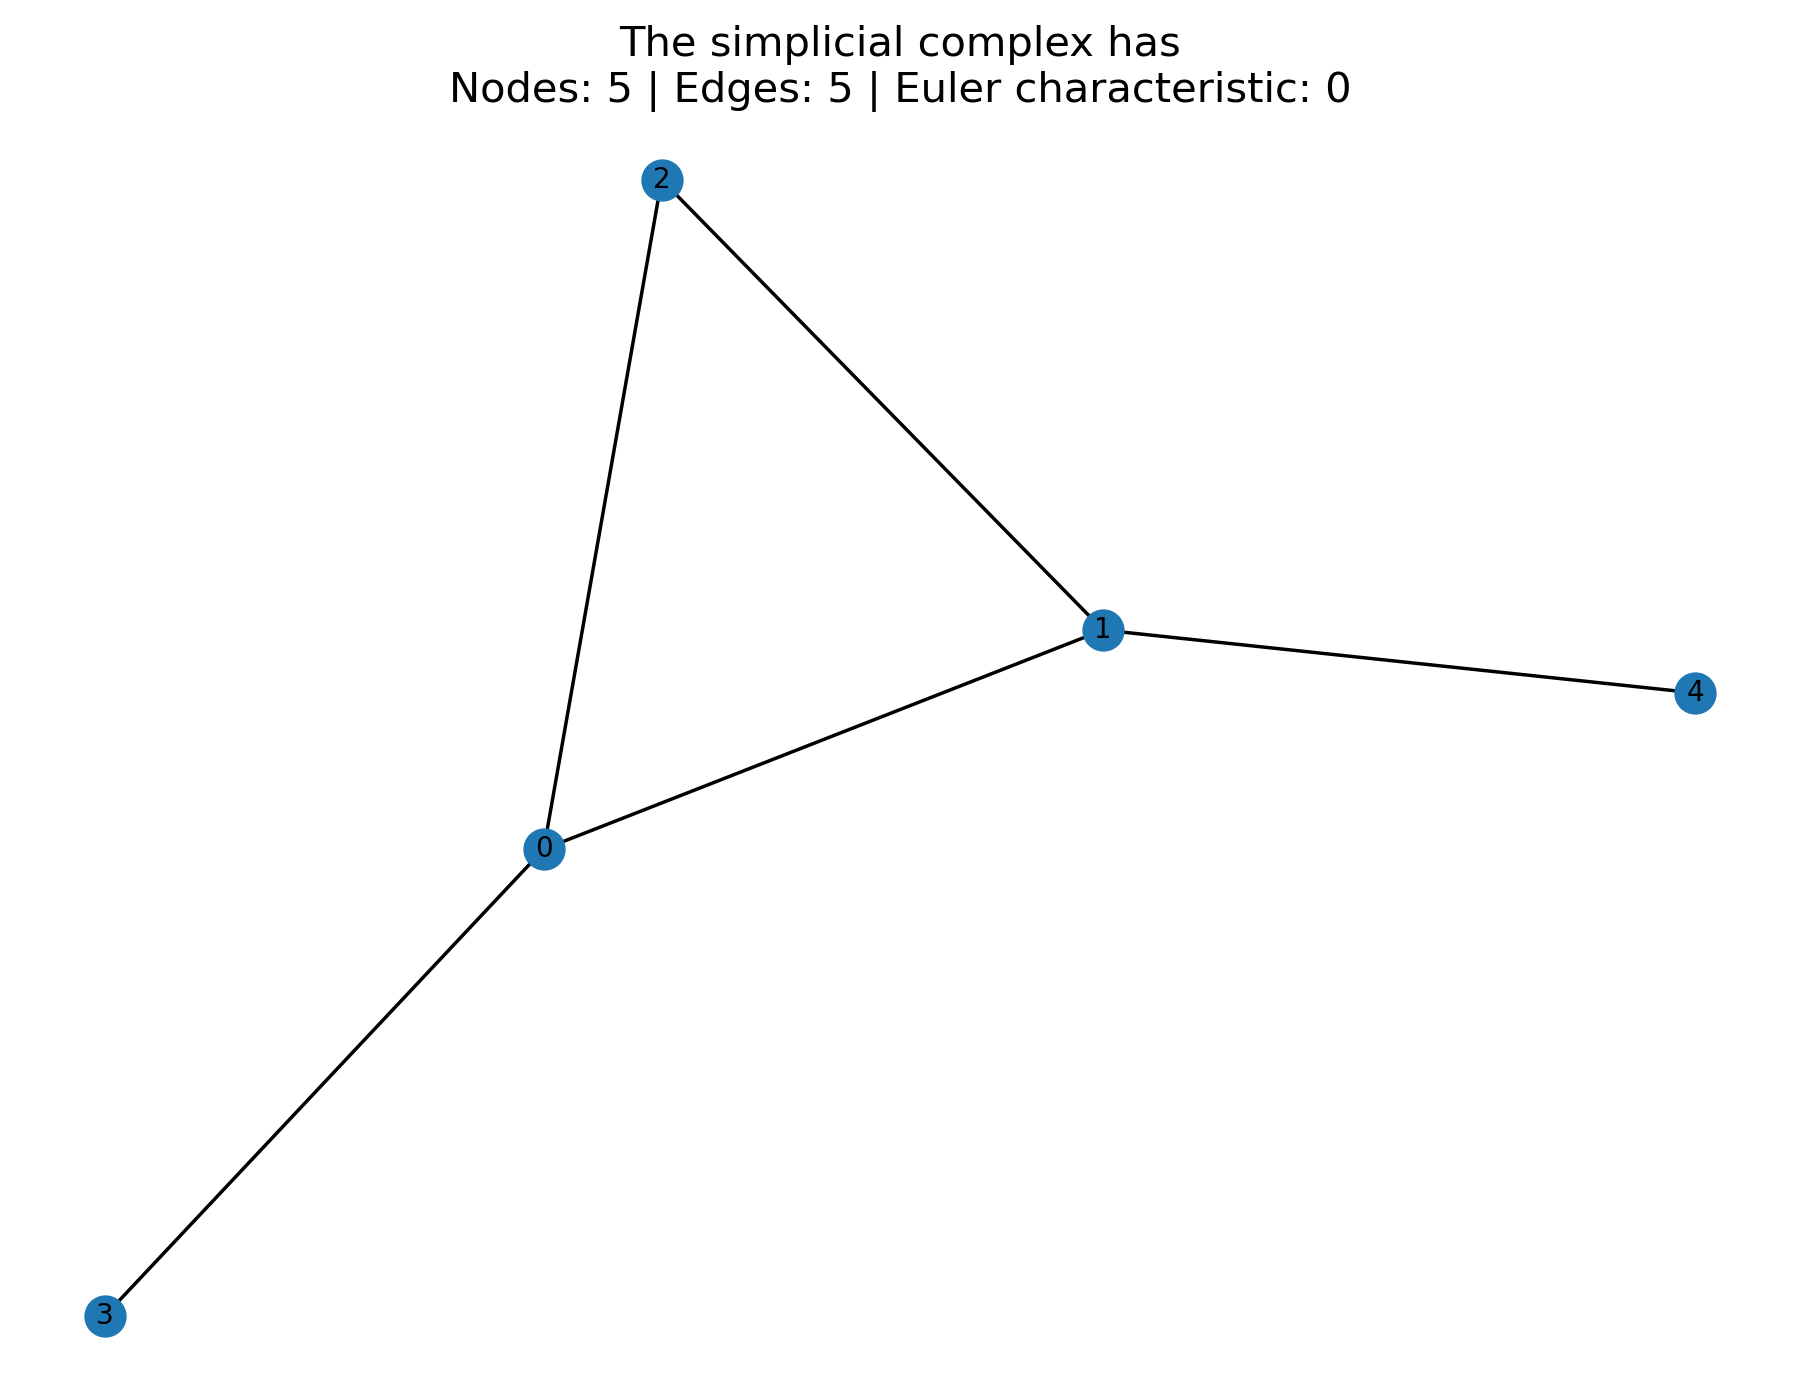

In [7]:
plotFaces(onlyEdges)

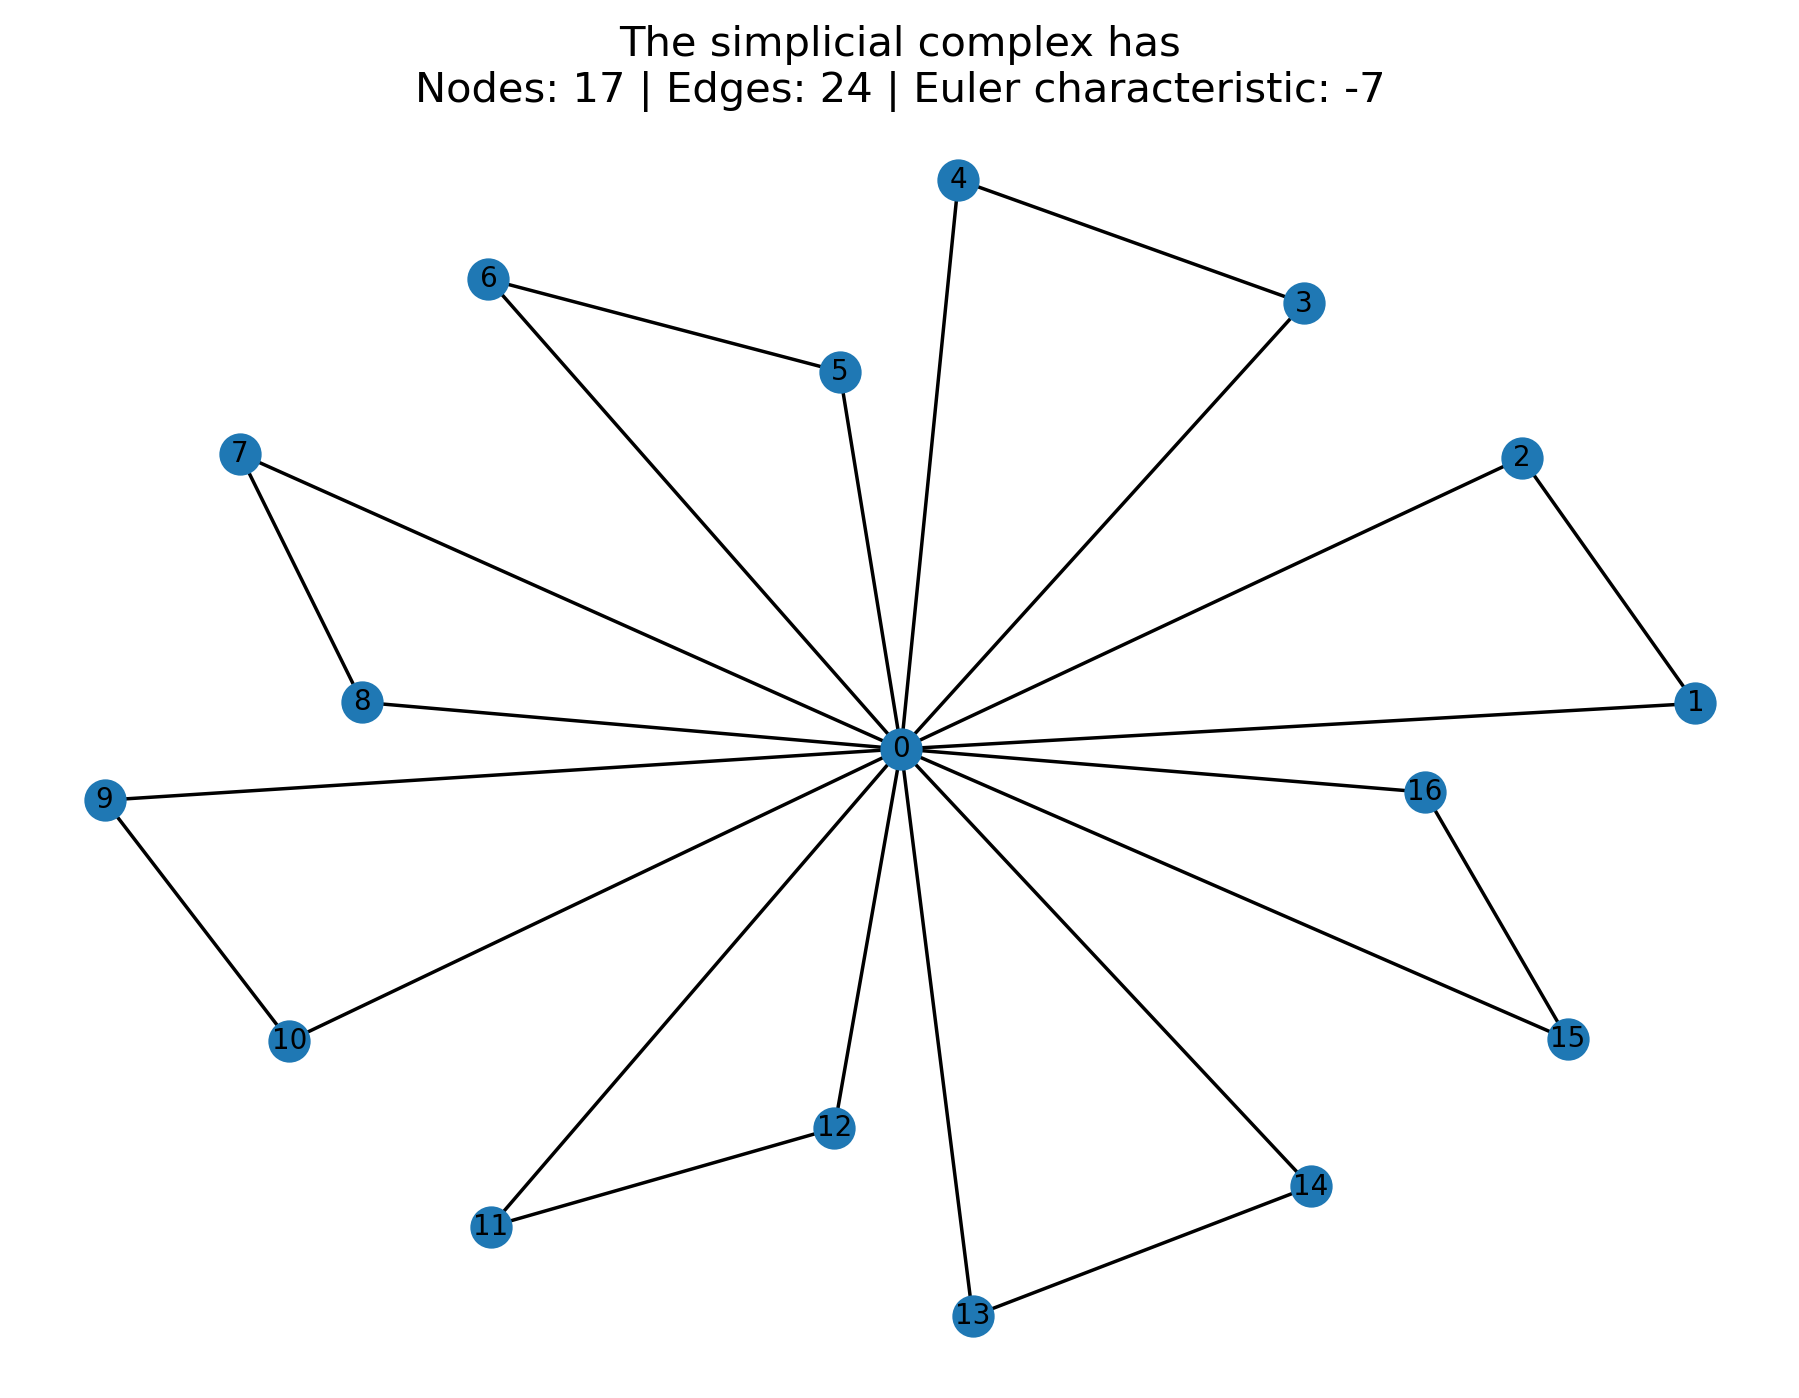

In [8]:
sc = gudhi.SimplexTree()
sc.insert([0])
for i in range(8):
    sc.insert([0, 2*i+1])
    sc.insert([0, 2*i+2])
    sc.insert([2*i+1, 2*i+2])
plotFaces(sc)

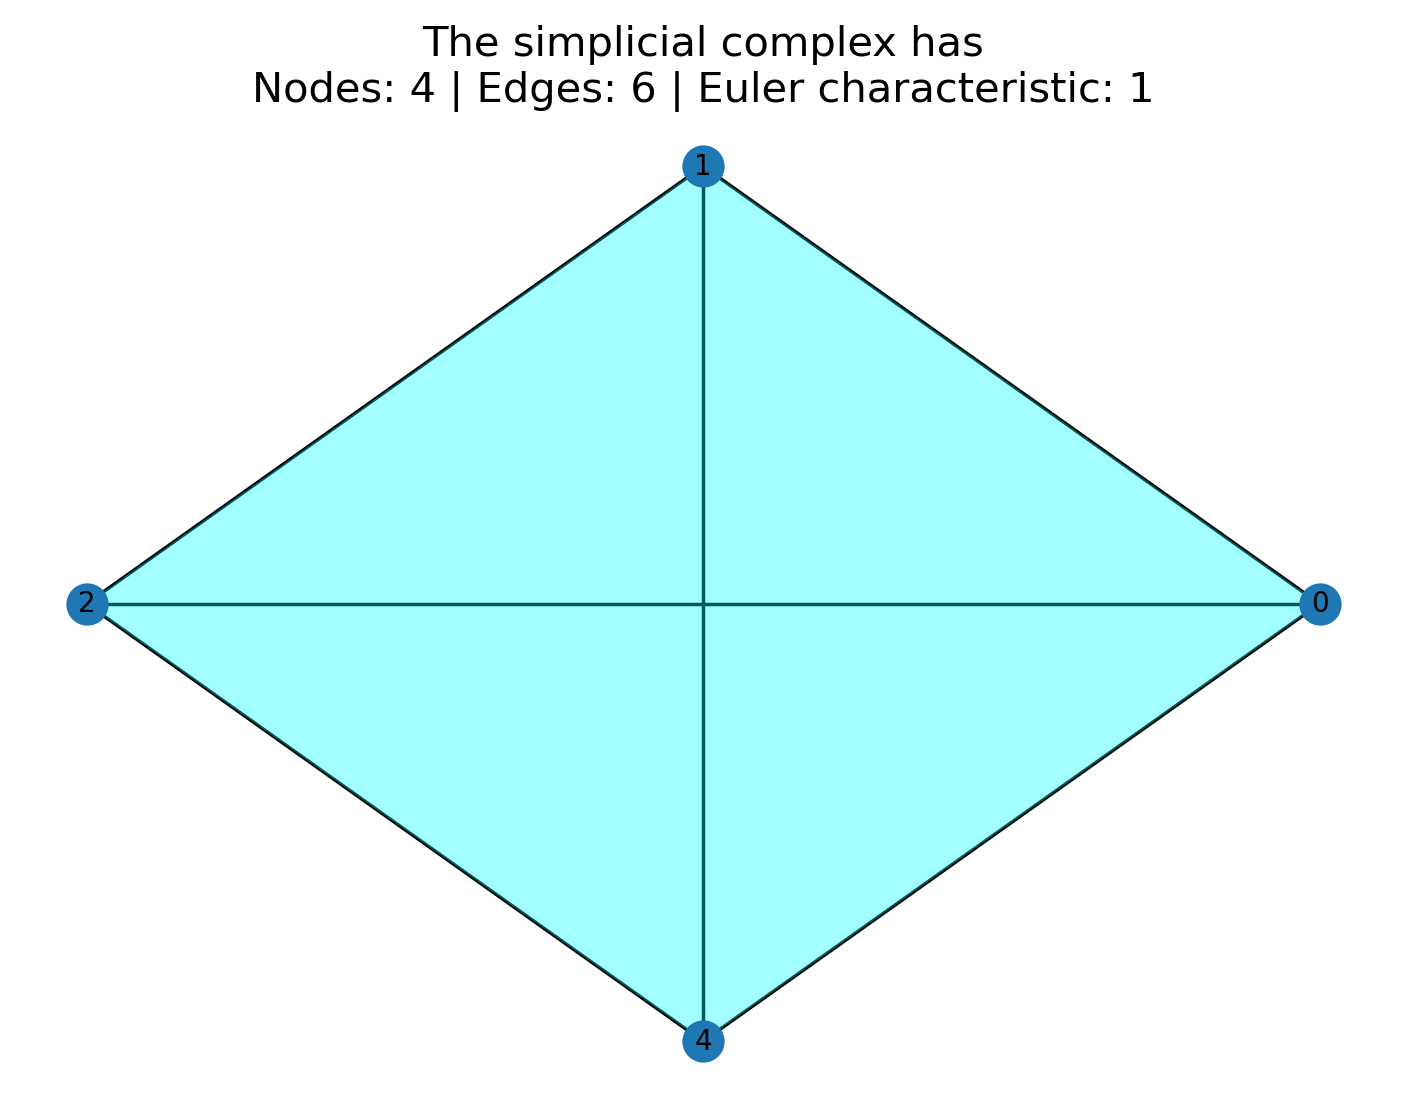

In [9]:
sc = gudhi.SimplexTree()
sc.insert([0,1,2,4])    
plotFaces(sc)

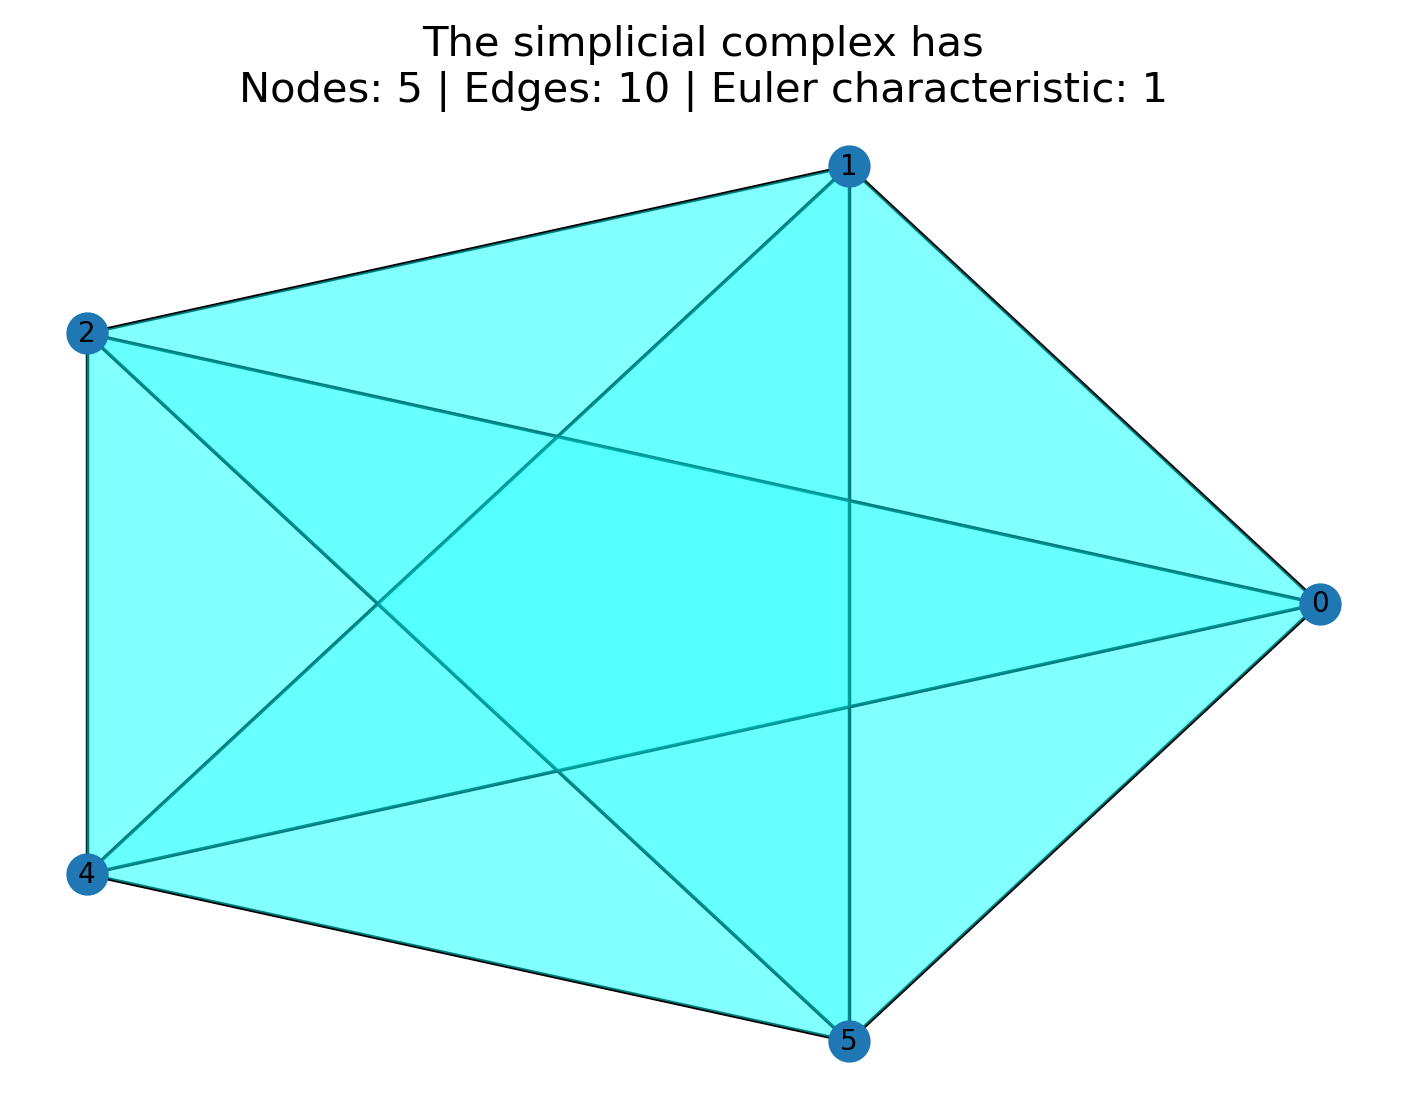

In [10]:
sc = gudhi.SimplexTree()
sc.insert([0,1,2,4,5])    
plotFaces(sc)

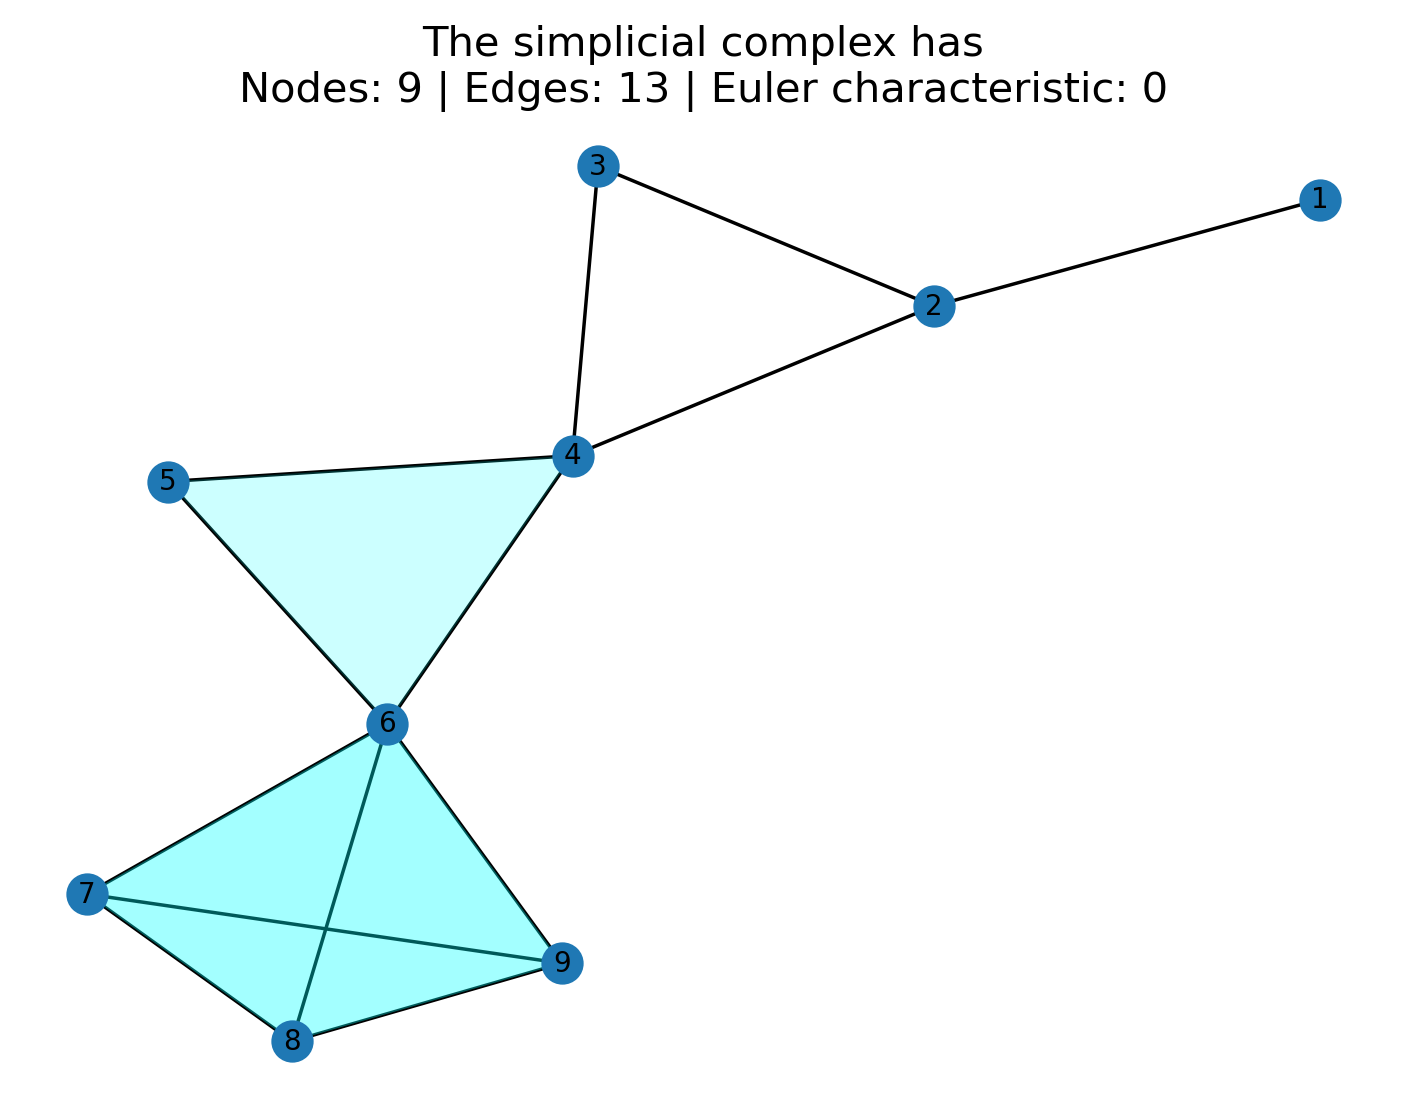

In [11]:
sc = gudhi.SimplexTree()

sc.insert([1,2])
sc.insert([2,3])
sc.insert([3,4])
sc.insert([4,2])
sc.insert([4,5,6])
sc.insert([6,7,8,9])
    
plotFaces(sc)

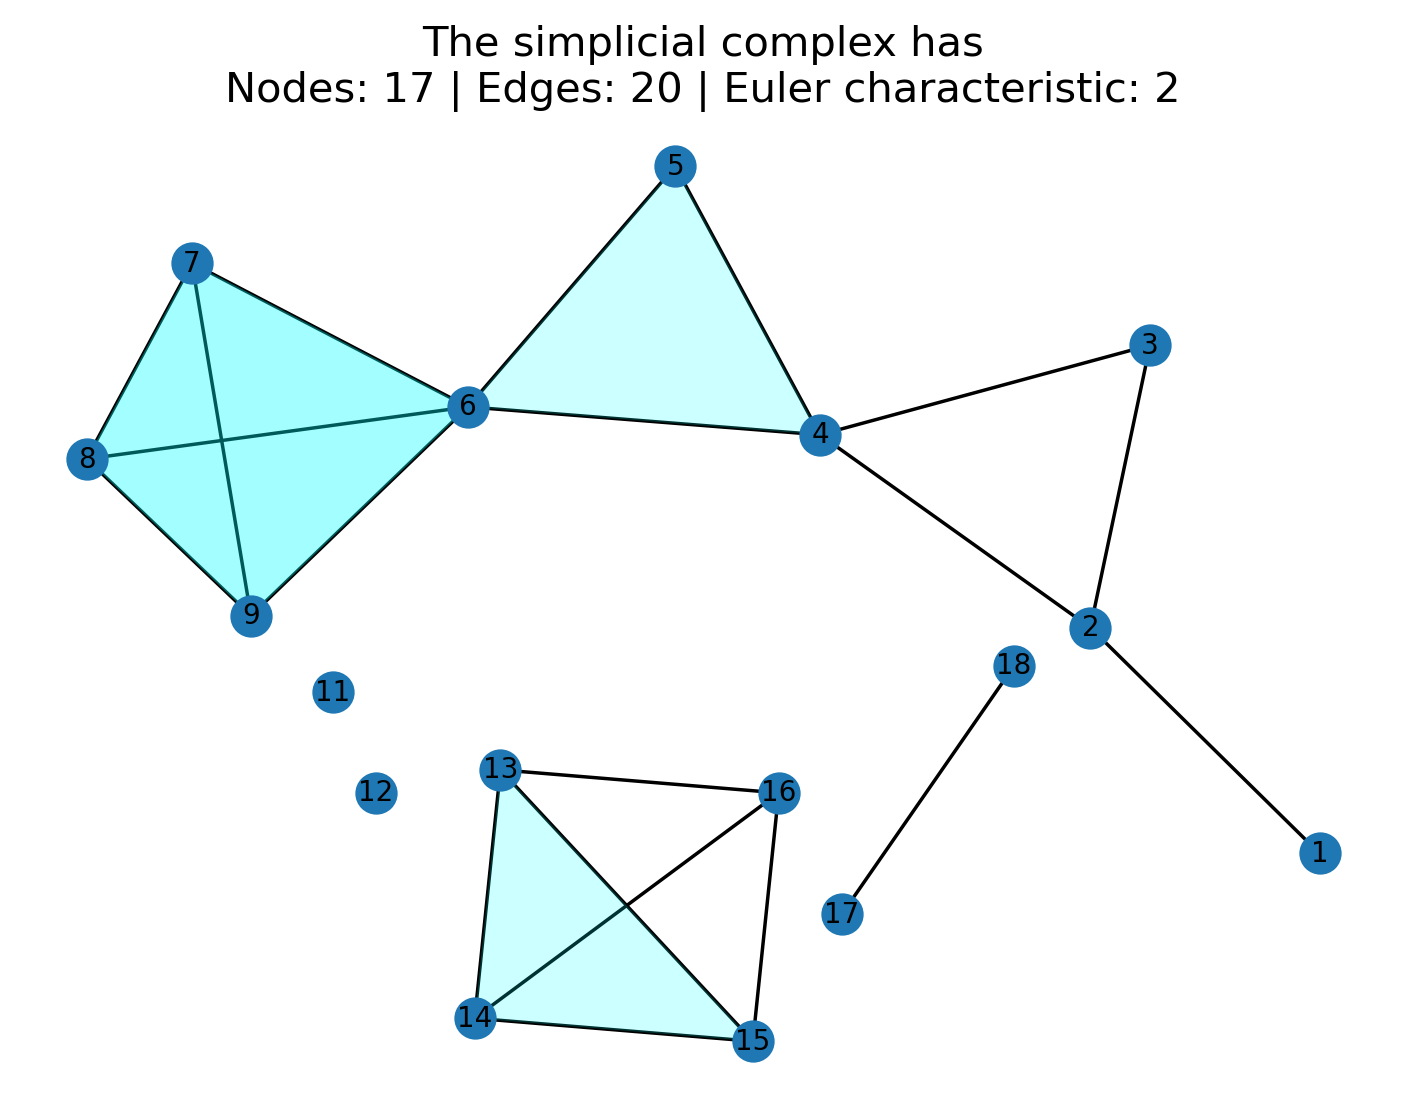

In [12]:
sc = gudhi.SimplexTree()

sc.insert([1,2])
sc.insert([2,3])
sc.insert([3,4])
sc.insert([4,2])
sc.insert([4,5,6])
sc.insert([6,7,8,9])
sc.insert([11])
sc.insert([12])
sc.insert([13,14,15])
sc.insert([13,16])
sc.insert([14,16])
sc.insert([15,16])
sc.insert([17,18])
    
plotFaces(sc)

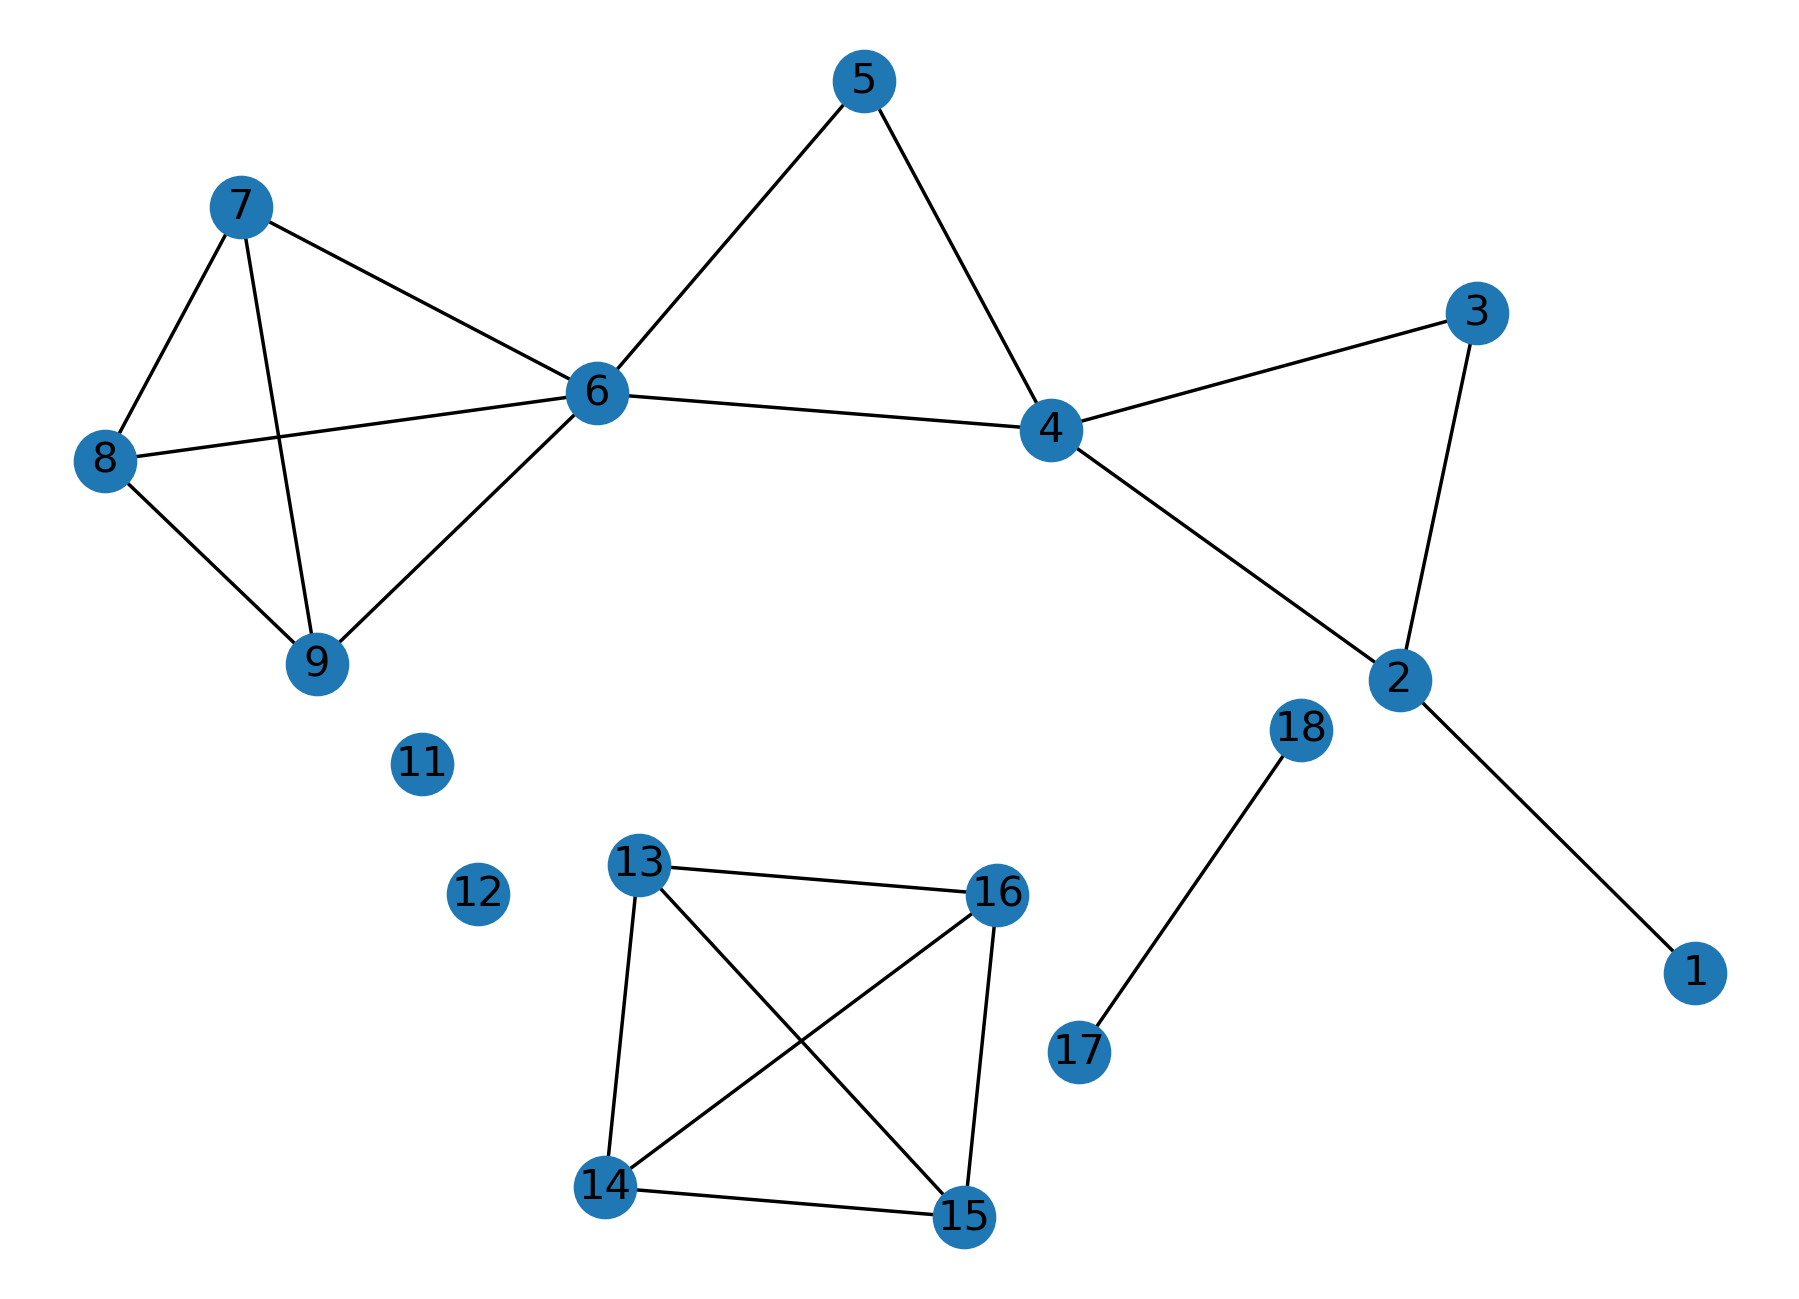

In [13]:
#original plot from the course
DrawSimplicialComplex(sc)